In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from PIL import Image
import requests
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
import warnings
from bs4 import BeautifulSoup 
from matplotlib.colors import LinearSegmentedColormap

In [2]:
font_properties = {'family': 'Arial', 'size': 12}

font_properties_titles = {'family': 'Arial', 'size': 20}

font_properties_axes = {'family': 'Arial', 'size': 16}

sns.set_theme(style='whitegrid',
              palette='deep',
              font='Arial',
              font_scale=1.5,
              color_codes=True,
              rc=None)

mpl.rcParams['figure.dpi'] = 300

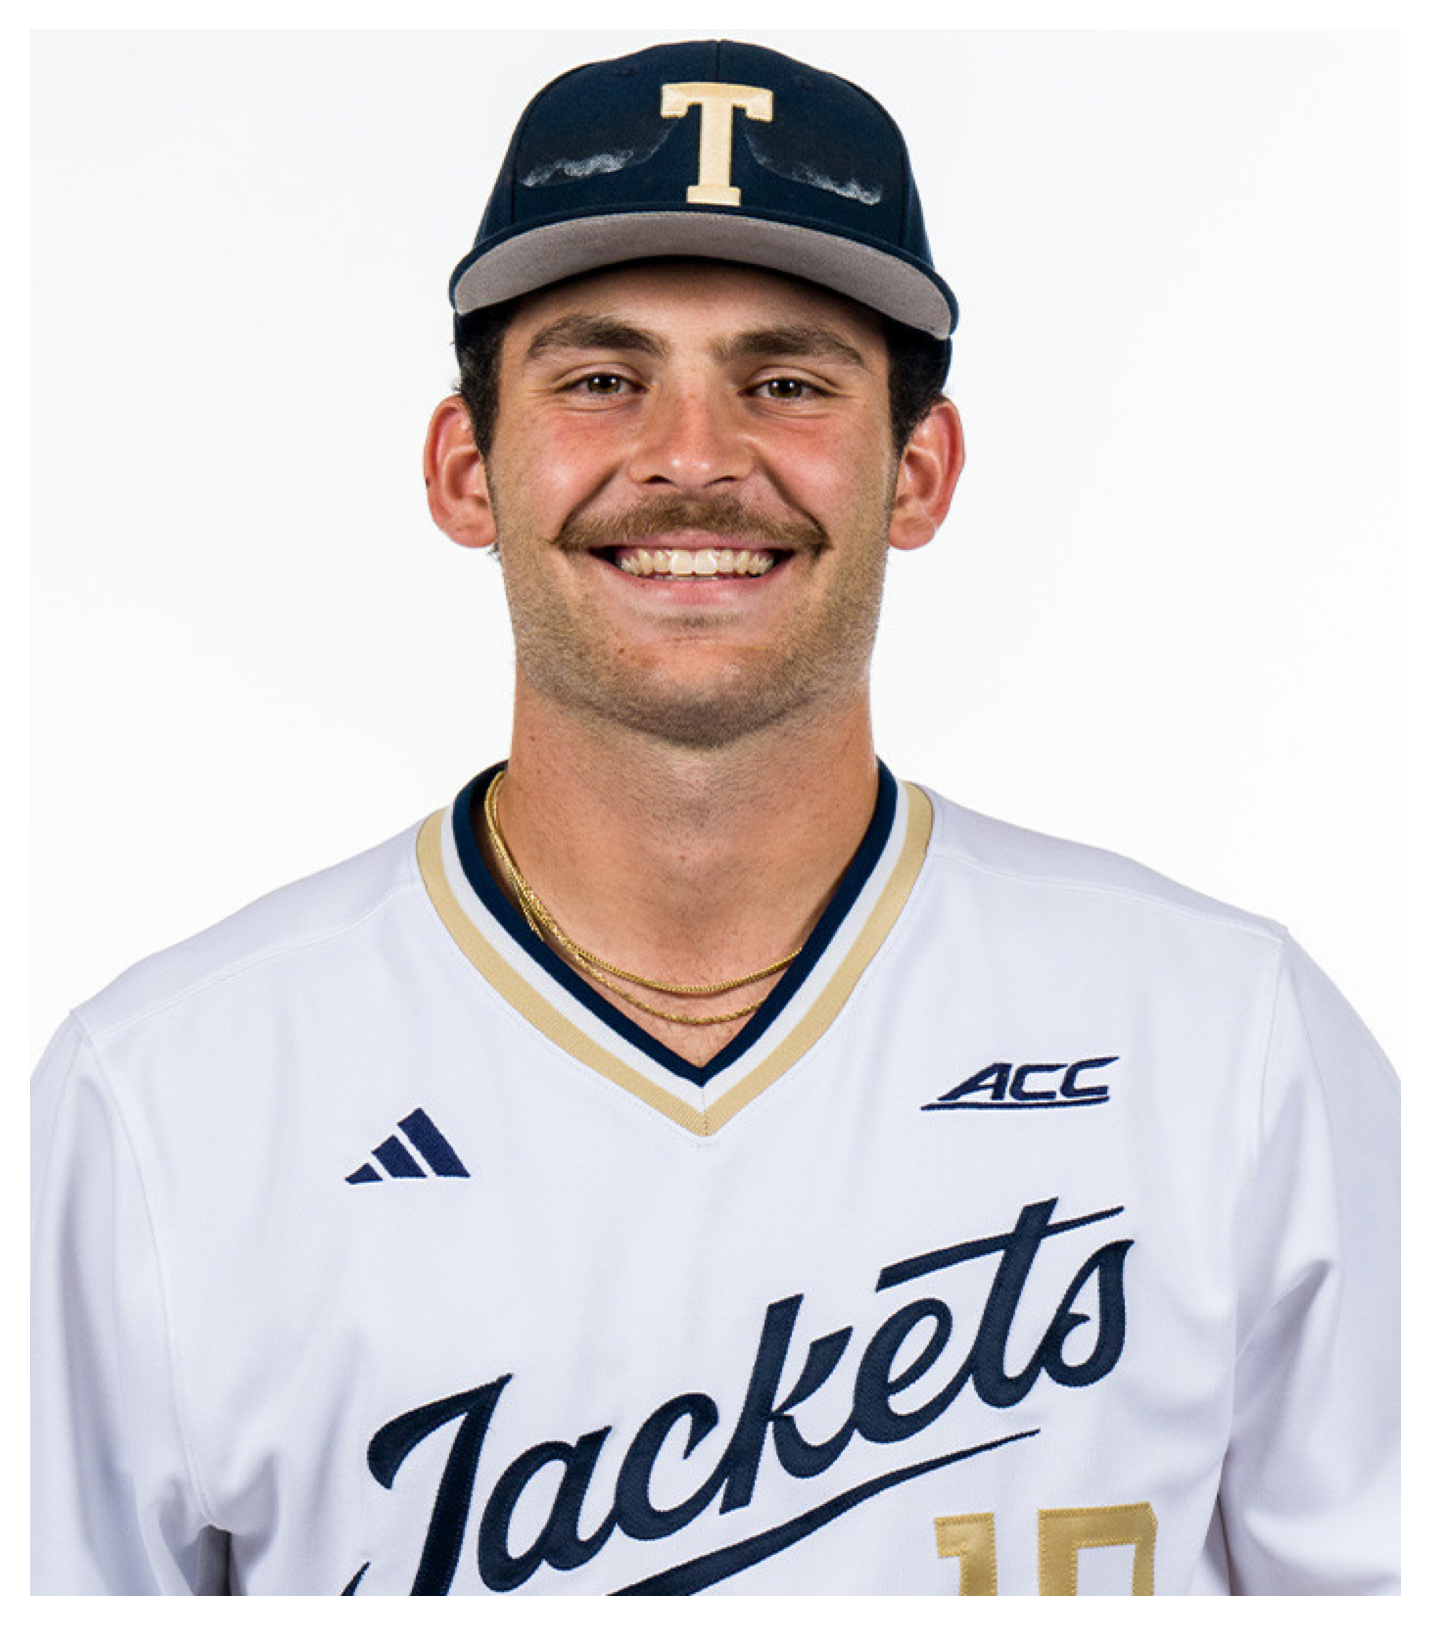

In [3]:
def player_headshot(ax: plt.Axes):

    #CHANGE, get from team website if possible
    url = f'https://ramblinwreck.com/imgproxy/qb309BigMh-NUyR_mSo3f7qBPNGPEL3CT9uaen6bgwM/fit/2500/2500/ce/0/aHR0cHM6Ly9yYW1ibGlud3JlY2suY29tL3dwLWNvbnRlbnQvdXBsb2Fkcy8yMDI0LzExL0tlbnQtU2NobWlkdC1IUy5qcGc.jpg'

    response = requests.get(url)

    img = Image.open(BytesIO(response.content))

    img_width, img_height = img.size

    image = OffsetImage(img, zoom=.47, resample=True)

    ab = AnnotationBbox(image, (0.5, 0.5), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)

    ax.add_artist(ab)

    ax.axis('off')

fig, ax = plt.subplots(figsize=(2, 2)) 
player_headshot(ax=ax)
plt.show()

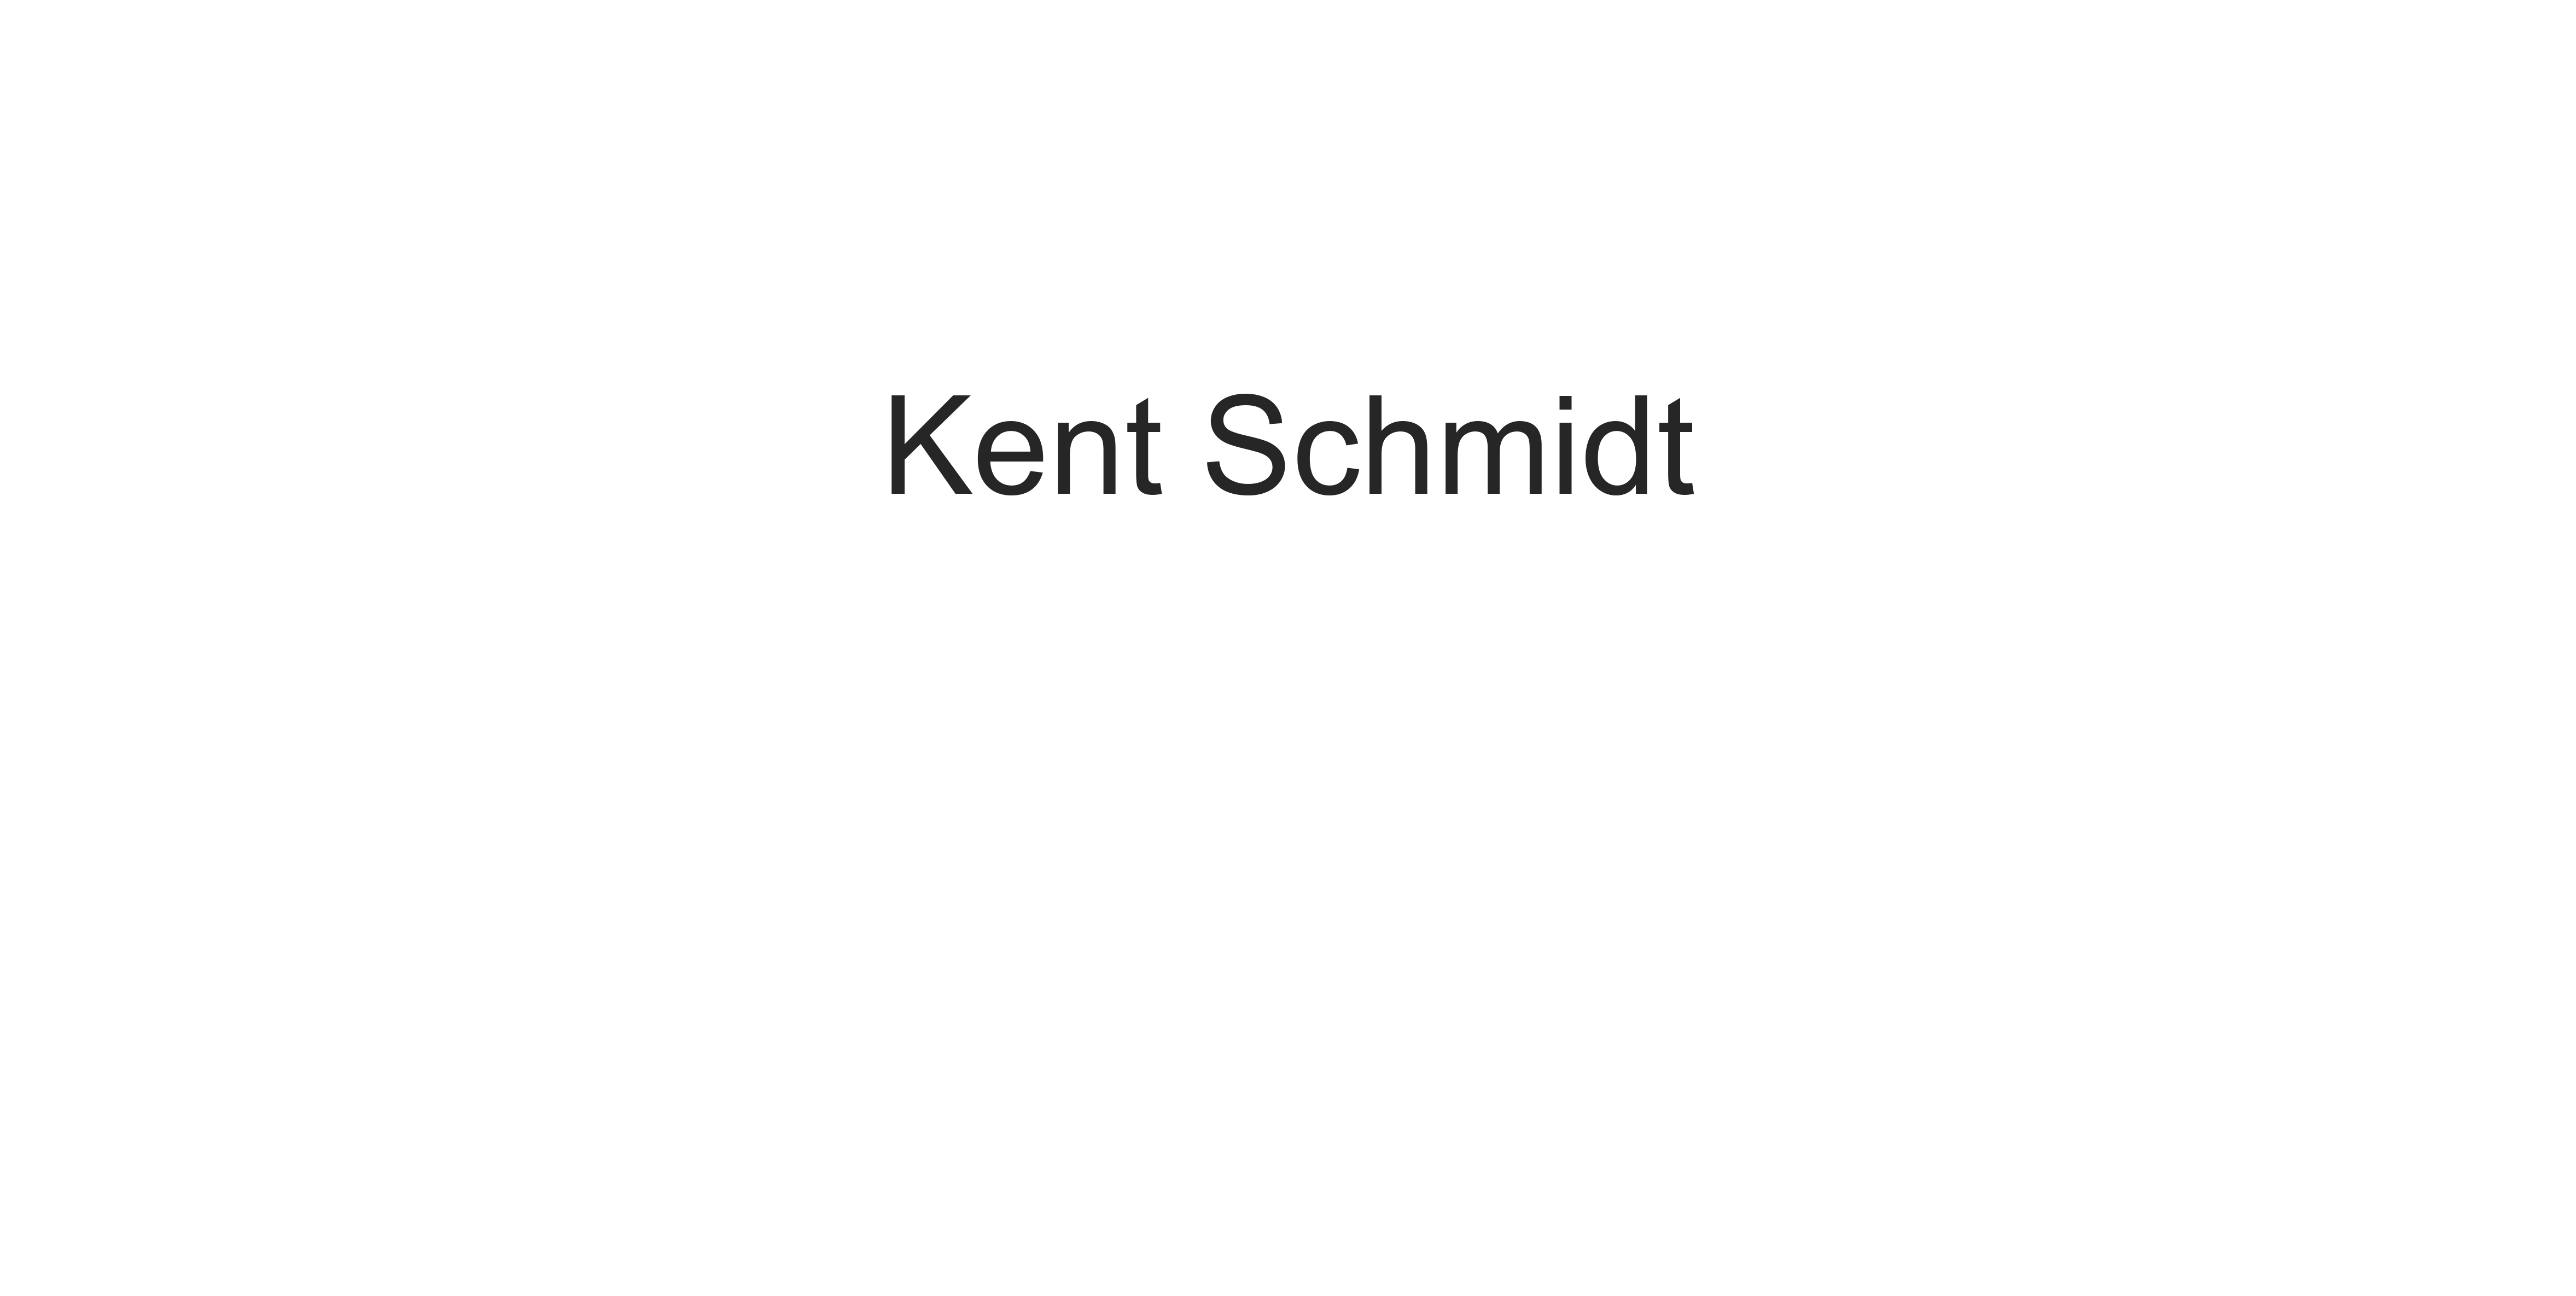

In [4]:
def player_name(ax: plt.Axes):

    #CHANGE
    player_name = "Kent Schmidt"
    ax.text(0.5, .65, f'{player_name}', va='center', ha='center', fontsize=60)
    
    ax.axis('off')
    
player_name(ax=plt.subplots(figsize=(20, 10))[1])

In [5]:
def notes(fig, x, y, text, fontsize=12, fontweight='normal', color='black'):

    fig.text(x, y, text, fontsize=fontsize, fontweight=fontweight, color=color, ha='left', va='top')

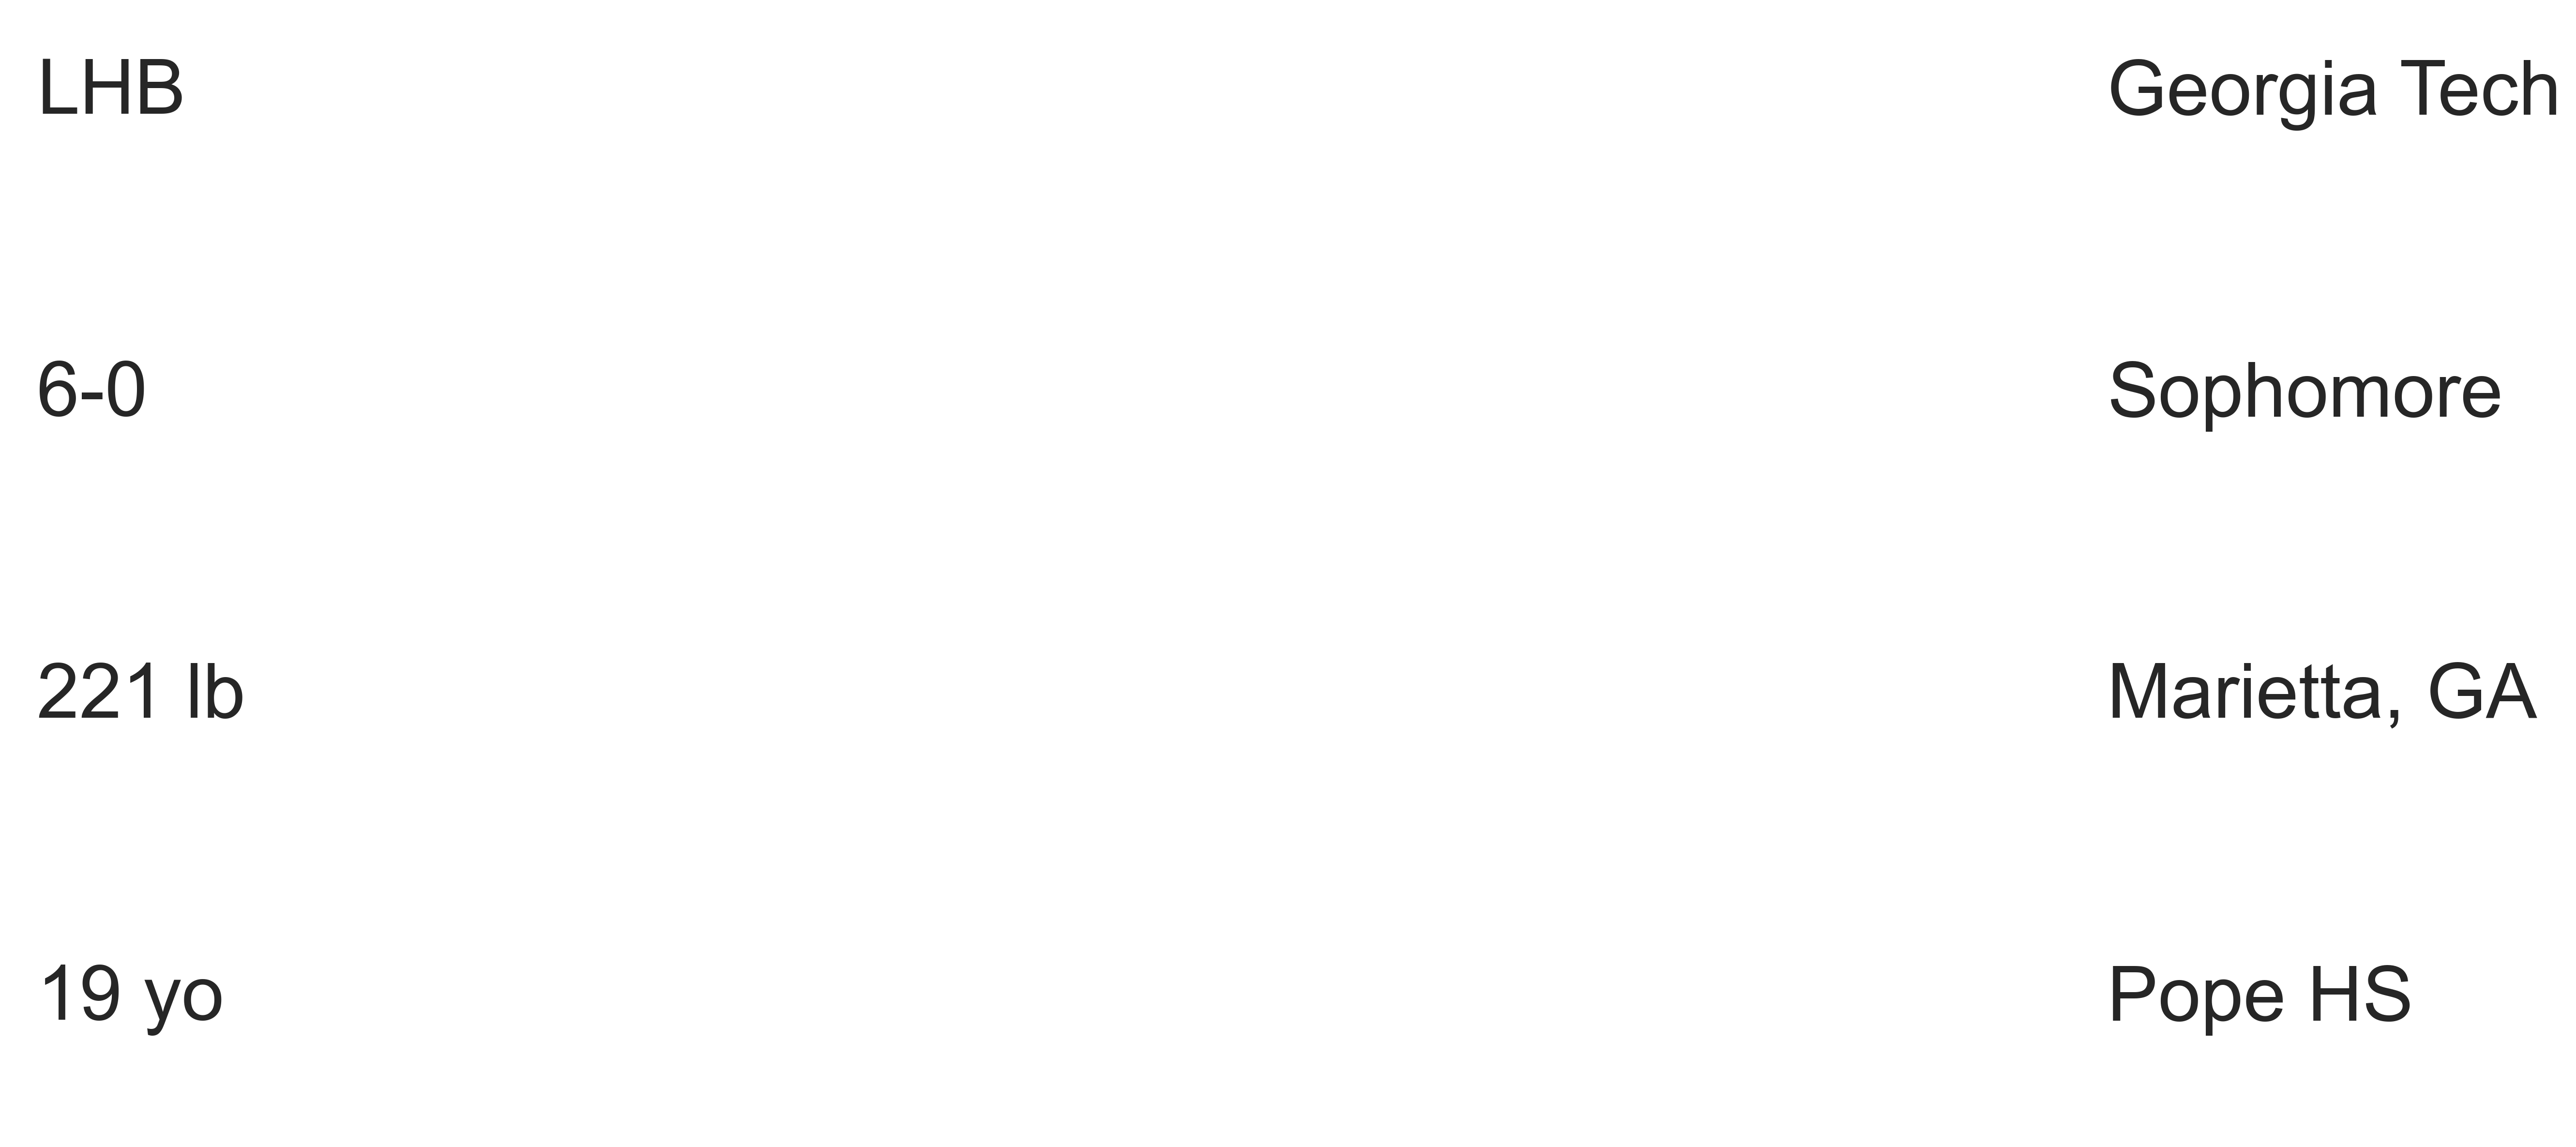

In [6]:
def player_bio(ax: plt.Axes):

    #CHANGE
    hitter_hand = "LHB"
    height = "6-0"
    weight = "221 lb"
    age = "19 yo"
    college = "Georgia Tech"
    year = "Sophomore"
    home_town = "Marietta, GA"
    high_school = "Pope HS"
    
    ax.text(0.01, .96, f'{hitter_hand}', va='top', ha='left', fontsize=38)
    ax.text(0.01, 0.69, f'{height}', va='top', ha='left', fontsize=38)
    ax.text(0.01, 0.42, f'{weight}', va='top', ha='left', fontsize=38)
    ax.text(0.01, 0.15, f'{age}', va='top', ha= 'left', fontsize=38)
    ax.text(.93, .96, f'{college}', va='top', ha='left', fontsize=38)
    ax.text(.93, 0.69, f'{year}', va='top', ha='left', fontsize=38)
    ax.text(.93, 0.42, f'{home_town}', va='top', ha='left', fontsize=38)
    ax.text(.93, 0.15, f'{high_school}', va='top', ha= 'left', fontsize=38)
    
    ax.axis('off')

player_bio(ax=plt.subplots(figsize=(20, 10))[1])

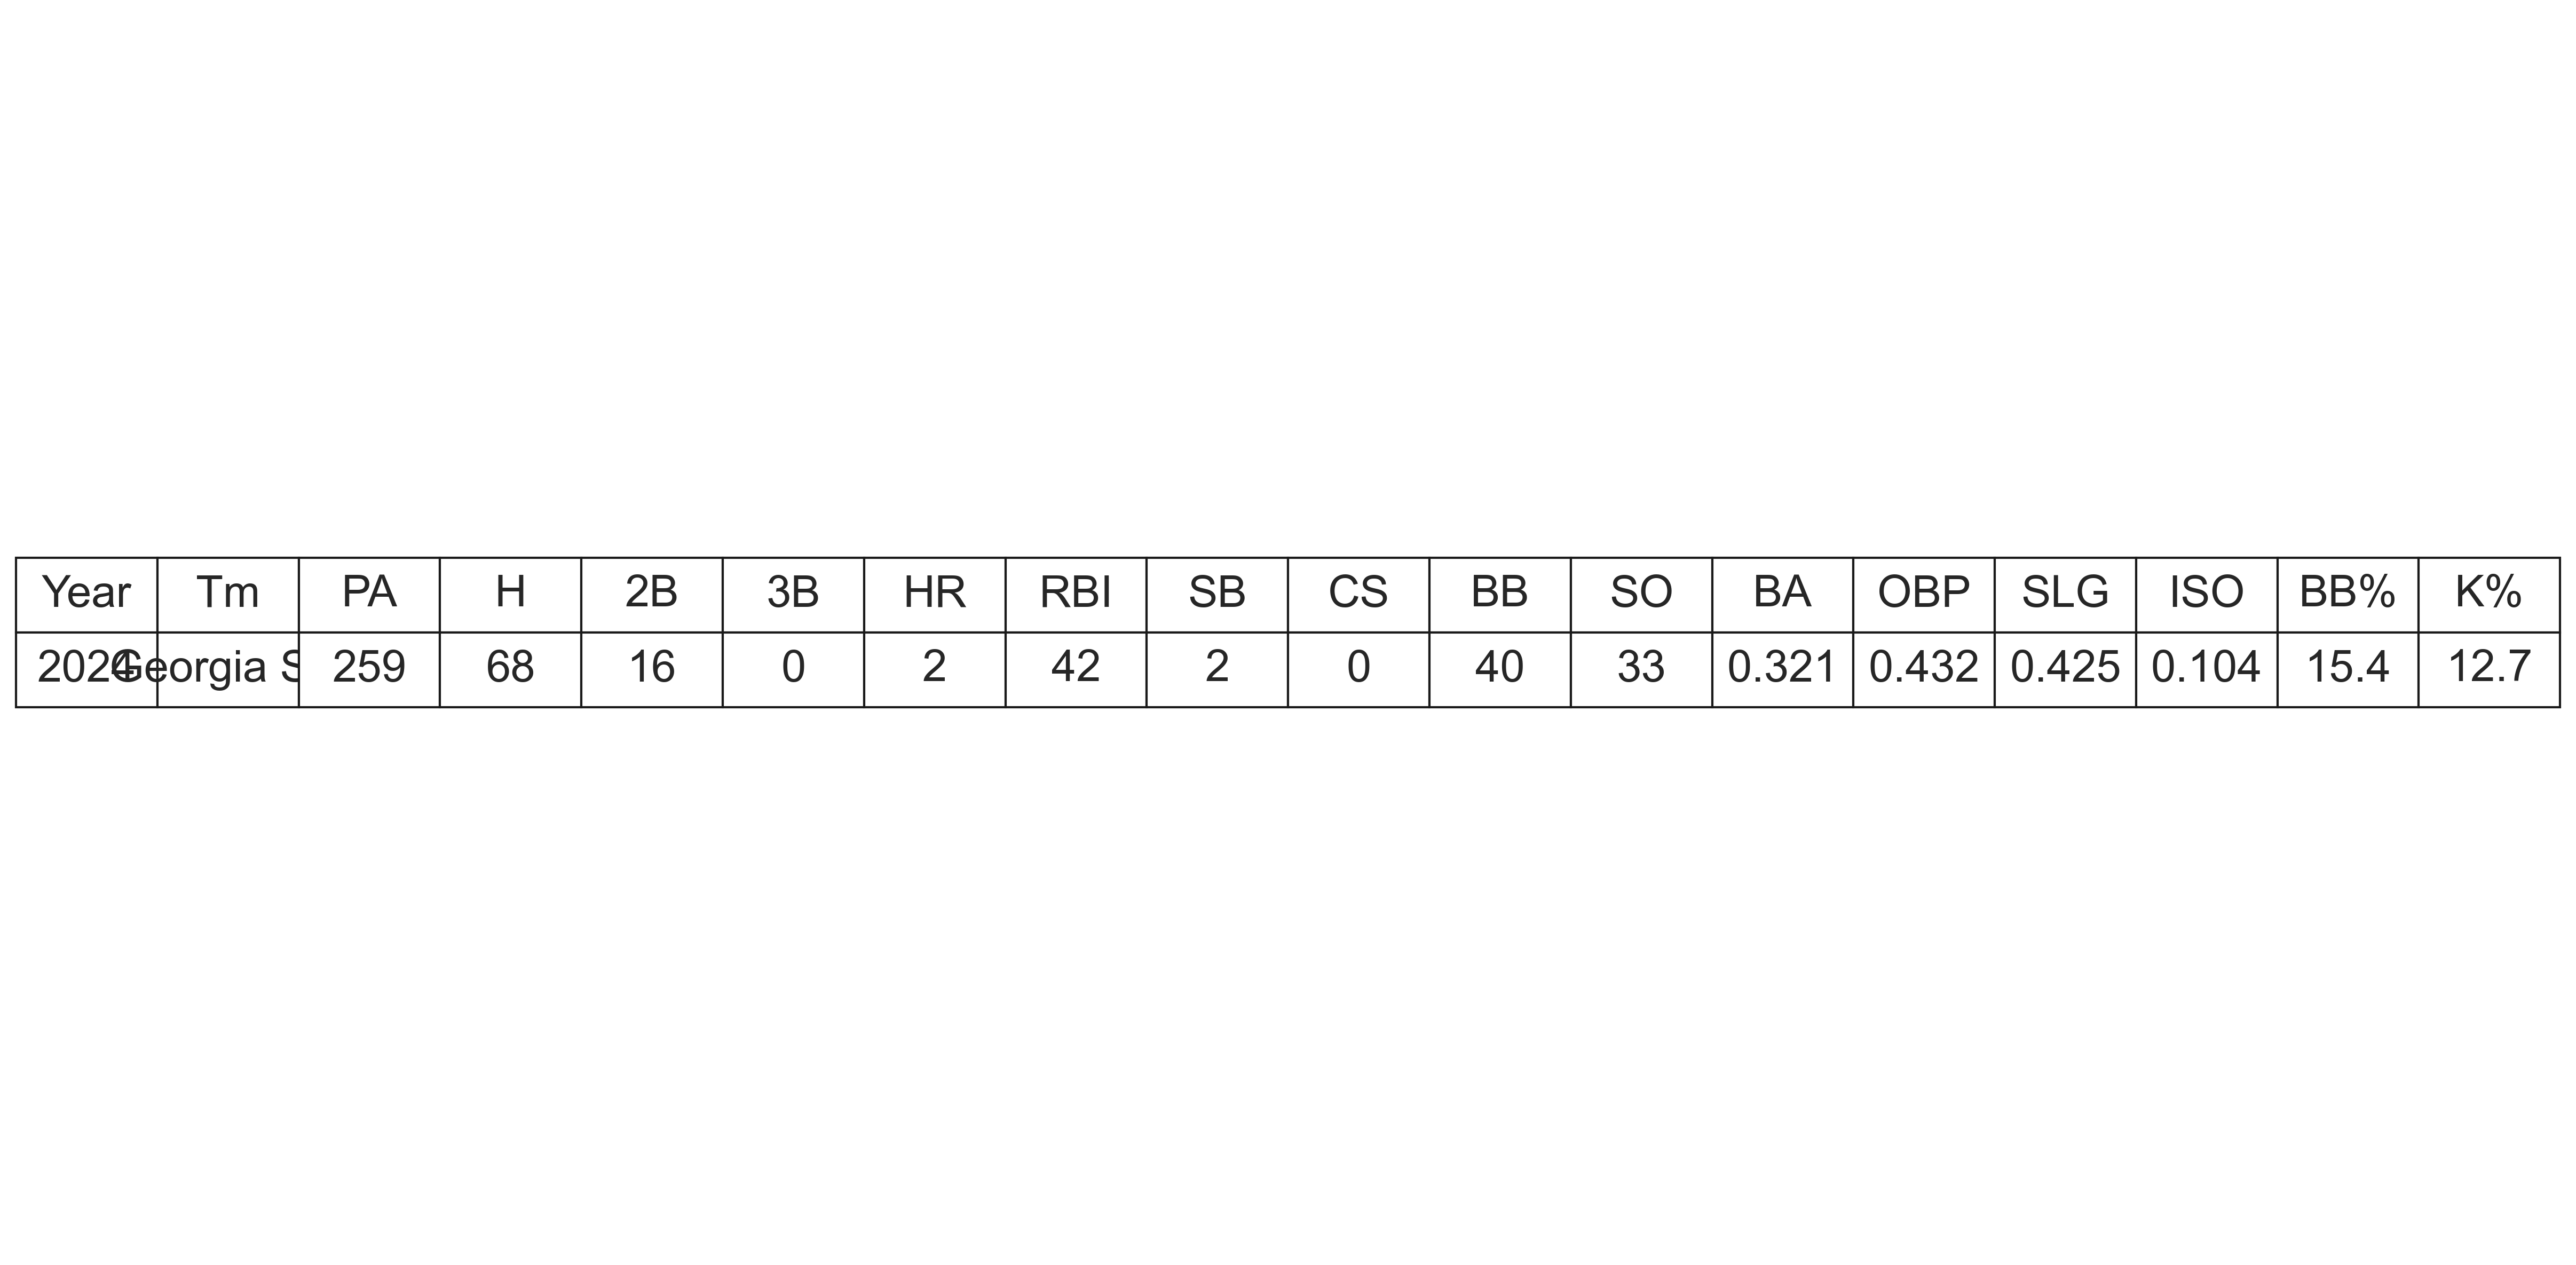

In [7]:
def basic_stats_table(ax: plt.Axes):

    warnings.filterwarnings("ignore", category=FutureWarning)

    #CHANGE
    url = "https://www.baseball-reference.com/register/player.fcgi?id=schmid000ken"

    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.text, 'lxml')

    table = soup.find('table', id='standard_batting')

    df = pd.read_html(str(table), flavor='lxml')[0]
    
    df.columns = df.columns.str.strip()
    df["Tm"] = df["Tm"].str.strip()

    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    df = df.dropna(subset=['Year'])

    df["Tm"] = df["Tm"].str.replace("\u00A0", " ").str.strip()

    filtered_df = df[
        (df["Year"].isin([2024])) & (df["Tm"].isin(["Georgia Southern"])) #CHANGE
    ].copy()

    filtered_df["Tm"] = filtered_df["Tm"].replace("Georgia Southern", "Georgia So.")

    filtered_df["ISO"] = pd.to_numeric(filtered_df["SLG"], errors="coerce") - pd.to_numeric(filtered_df["BA"], errors="coerce")

    filtered_df["BB%"] = (filtered_df["BB"] / filtered_df["PA"]) * 100
    filtered_df["K%"] = (filtered_df["SO"] / filtered_df["PA"]) * 100

    filtered_df["BB%"] = filtered_df["BB%"].map("{:.1f}".format)
    filtered_df["K%"] = filtered_df["K%"].map("{:.1f}".format)

    final_df = filtered_df[["Year", "Tm", "PA", "H", "2B", "3B", "HR", "RBI", "SB", "CS", "BB", "SO", "BA", "OBP", "SLG", "ISO", "BB%", "K%"]]

    final_df = final_df.copy()

    final_df.loc[:, "Year"] = final_df["Year"].astype(int)
    int_cols = ["PA", "H", "3B", "HR", "RBI", "SB", "CS", "BB", "SO"]
    for col in int_cols:
        final_df.loc[:, col] = final_df[col].astype(int)

    final_df.loc[:, "BA"] = final_df["BA"].astype(float).map("{:.3f}".format)
    final_df.loc[:, "OBP"] = final_df["OBP"].astype(float).map("{:.3f}".format)
    final_df.loc[:, "SLG"] = final_df["SLG"].astype(float).map("{:.3f}".format)
    final_df.loc[:, "ISO"] = final_df["ISO"].astype(float).map("{:.3f}".format)
    final_df["Year"] = final_df["Year"].astype(int)
    
    basic_stats_table = ax.table(
        cellText=final_df.values, 
        colLabels=final_df.columns, 
        loc="center", 
        cellLoc="center", 
        colLoc="center"
    )

    basic_stats_table.auto_set_font_size(False)
    basic_stats_table.set_fontsize(20)
    basic_stats_table.scale(2.05, 2.8)

    ax.axis("off")

basic_stats_table(ax=plt.subplots(figsize=(10, 10))[1])
plt.show()

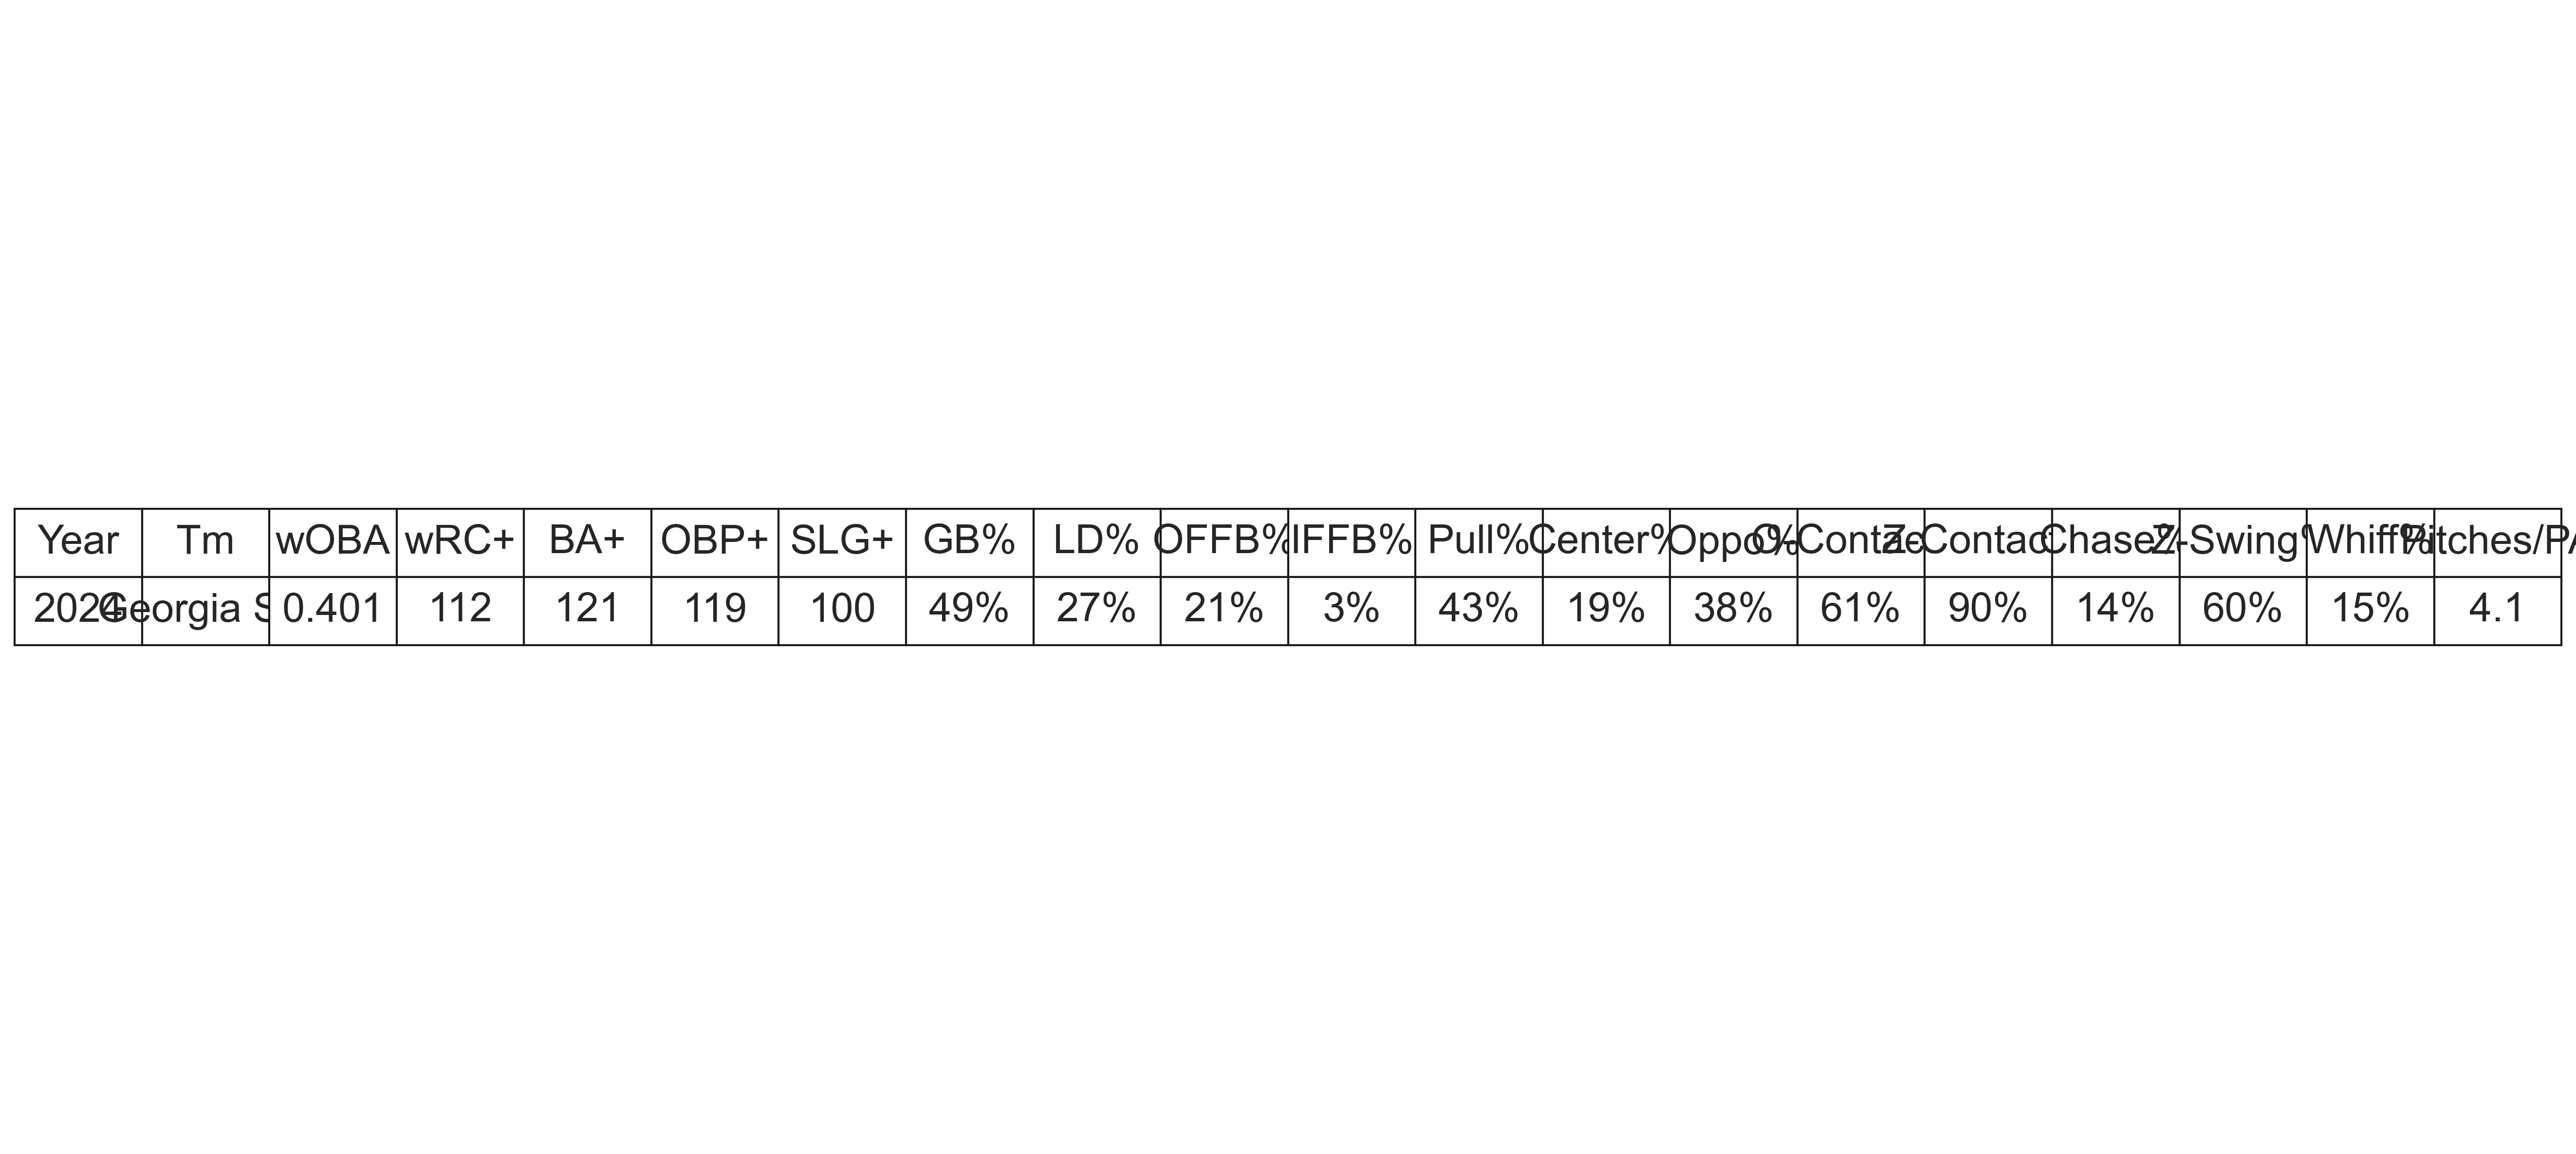

In [30]:
def advanced_stats_table(ax: plt.Axes):

    #CHANGE, years can be added if necessary
    data = {
        "Year": ["2024"],
        "Tm": ["Georgia So."],
        "wOBA": ["0.401"],
        "wRC+": ["112"],
        "BA+": ["121"],
        "OBP+": ["119"],
        "SLG+": ["100"],
        "GB%": ["49%"],
        "LD%": ["27%"],
        "OFFB%": ["21%"],
        "IFFB%": ["3%"],
        "Pull%": ["43%"],
        "Center%": ["19%"],
        "Oppo%": ["38%"],
        "O-Contact%": ["61%"],
        "Z-Contact%": ["90%"],
        "Chase%": ["14%"],
        "Z-Swing%": ["60%"],
        "Whiff%": ["15%"],
        "Pitches/PA": ["4.1"],
    }

    df = pd.DataFrame(data)

    table = ax.table(
        cellText=df.values,  
        colLabels=df.columns,  
        loc='center',   
        cellLoc='center',  
        colLoc='center'  
    )

    table.auto_set_font_size(False)
    table.set_fontsize(20)
    table.scale(2.25, 2.8)

    ax.axis('off')

advanced_stats_table(ax=plt.subplots(figsize=(10, 10))[1])

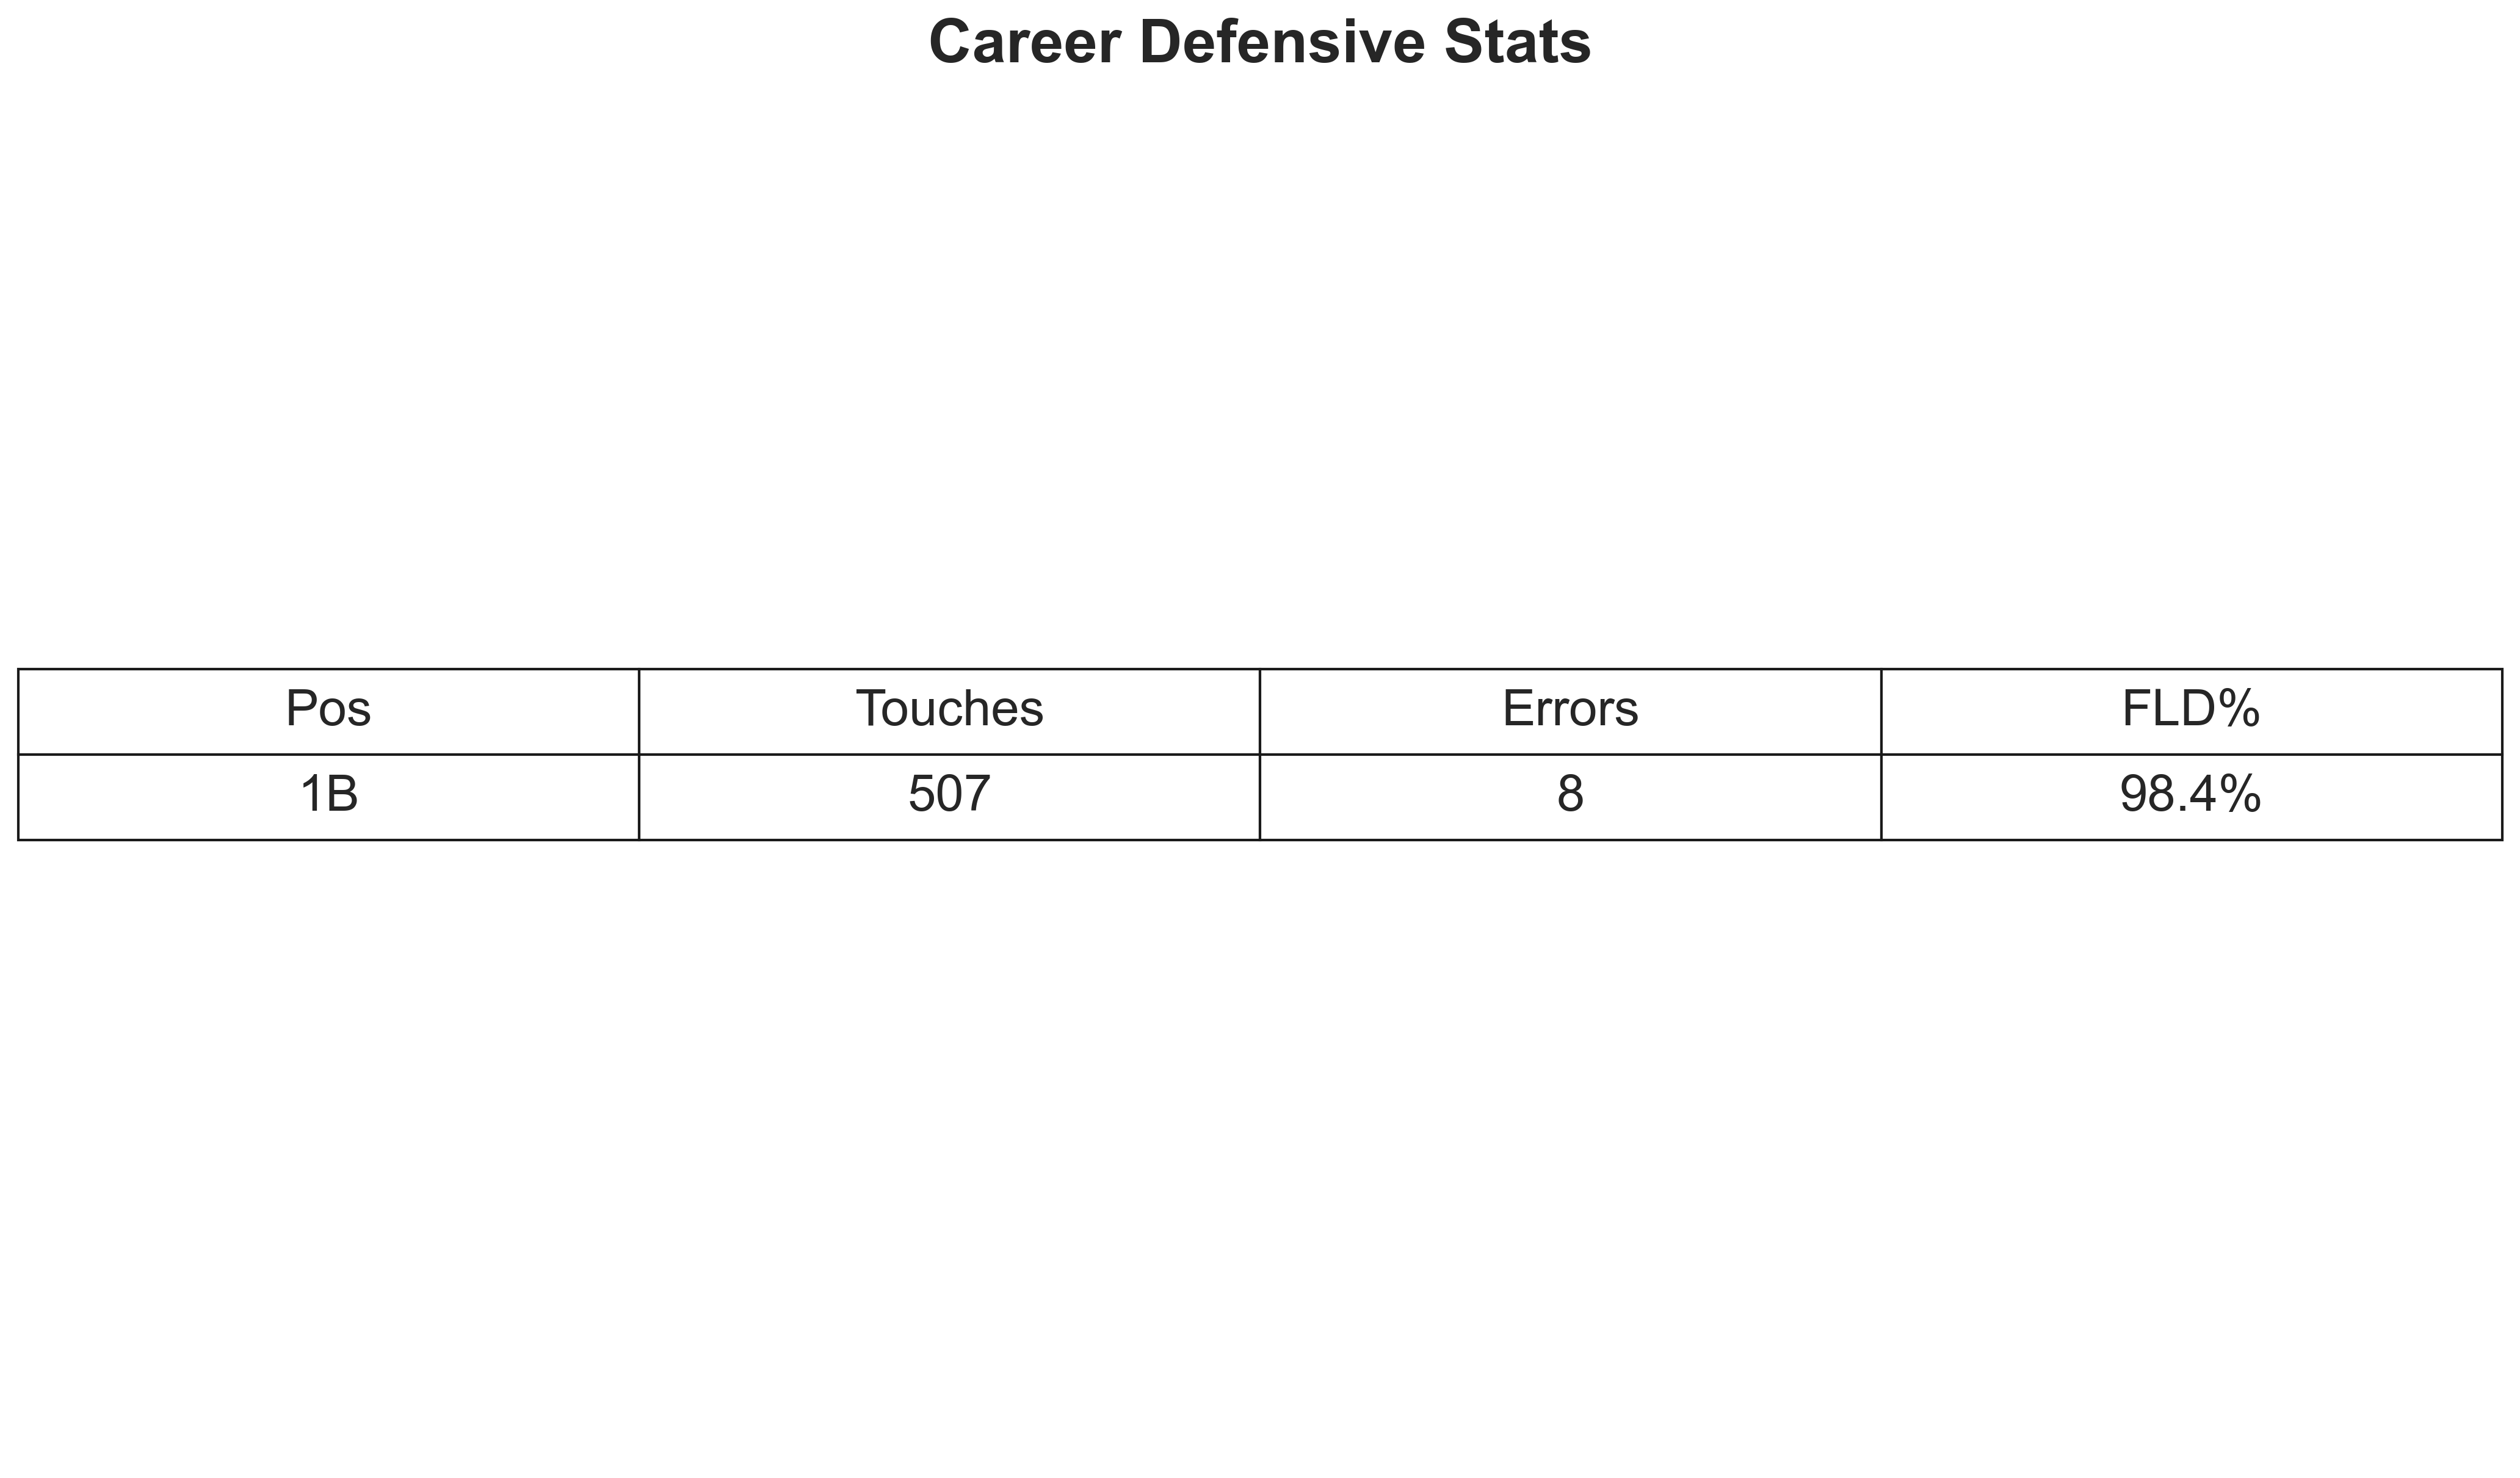

In [9]:
def defensive_stats_table(ax: plt.Axes):

    #CHANGE, positions can be added if necessary
    data = {
        "Pos": ["1B"],
        "Touches": ["507"],
        "Errors": ["8"],
        "FLD%": ["98.4%"],
    }

    df = pd.DataFrame(data)

    table = ax.table(
        cellText=df.values,  
        colLabels=df.columns,  
        loc='center',   
        cellLoc='center',  
        colLoc='center'  
    )

    table.auto_set_font_size(False)
    table.set_fontsize(20)
    table.scale(1.75, 2.8)

    ax.axis('off')

    ax.set_title('Career Defensive Stats', fontsize=24, fontweight='bold', pad=-5)
    
defensive_stats_table(ax=plt.subplots(figsize=(10, 10))[1])

In [10]:
#CHANGE
file_path = r"C:\Users\brend\OneDrive - Stonehill College\Pictures\Screenshots\Schmidt, Kent - Spray Chart.png"
def spray_chart(file_path, ax: plt.Axes):
    try:
        img = Image.open(file_path)
        
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("Kent Schmidt Career Spray Chart", fontweight='bold', fontsize=24)
        ax.set_aspect('auto', adjustable='box')
        
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

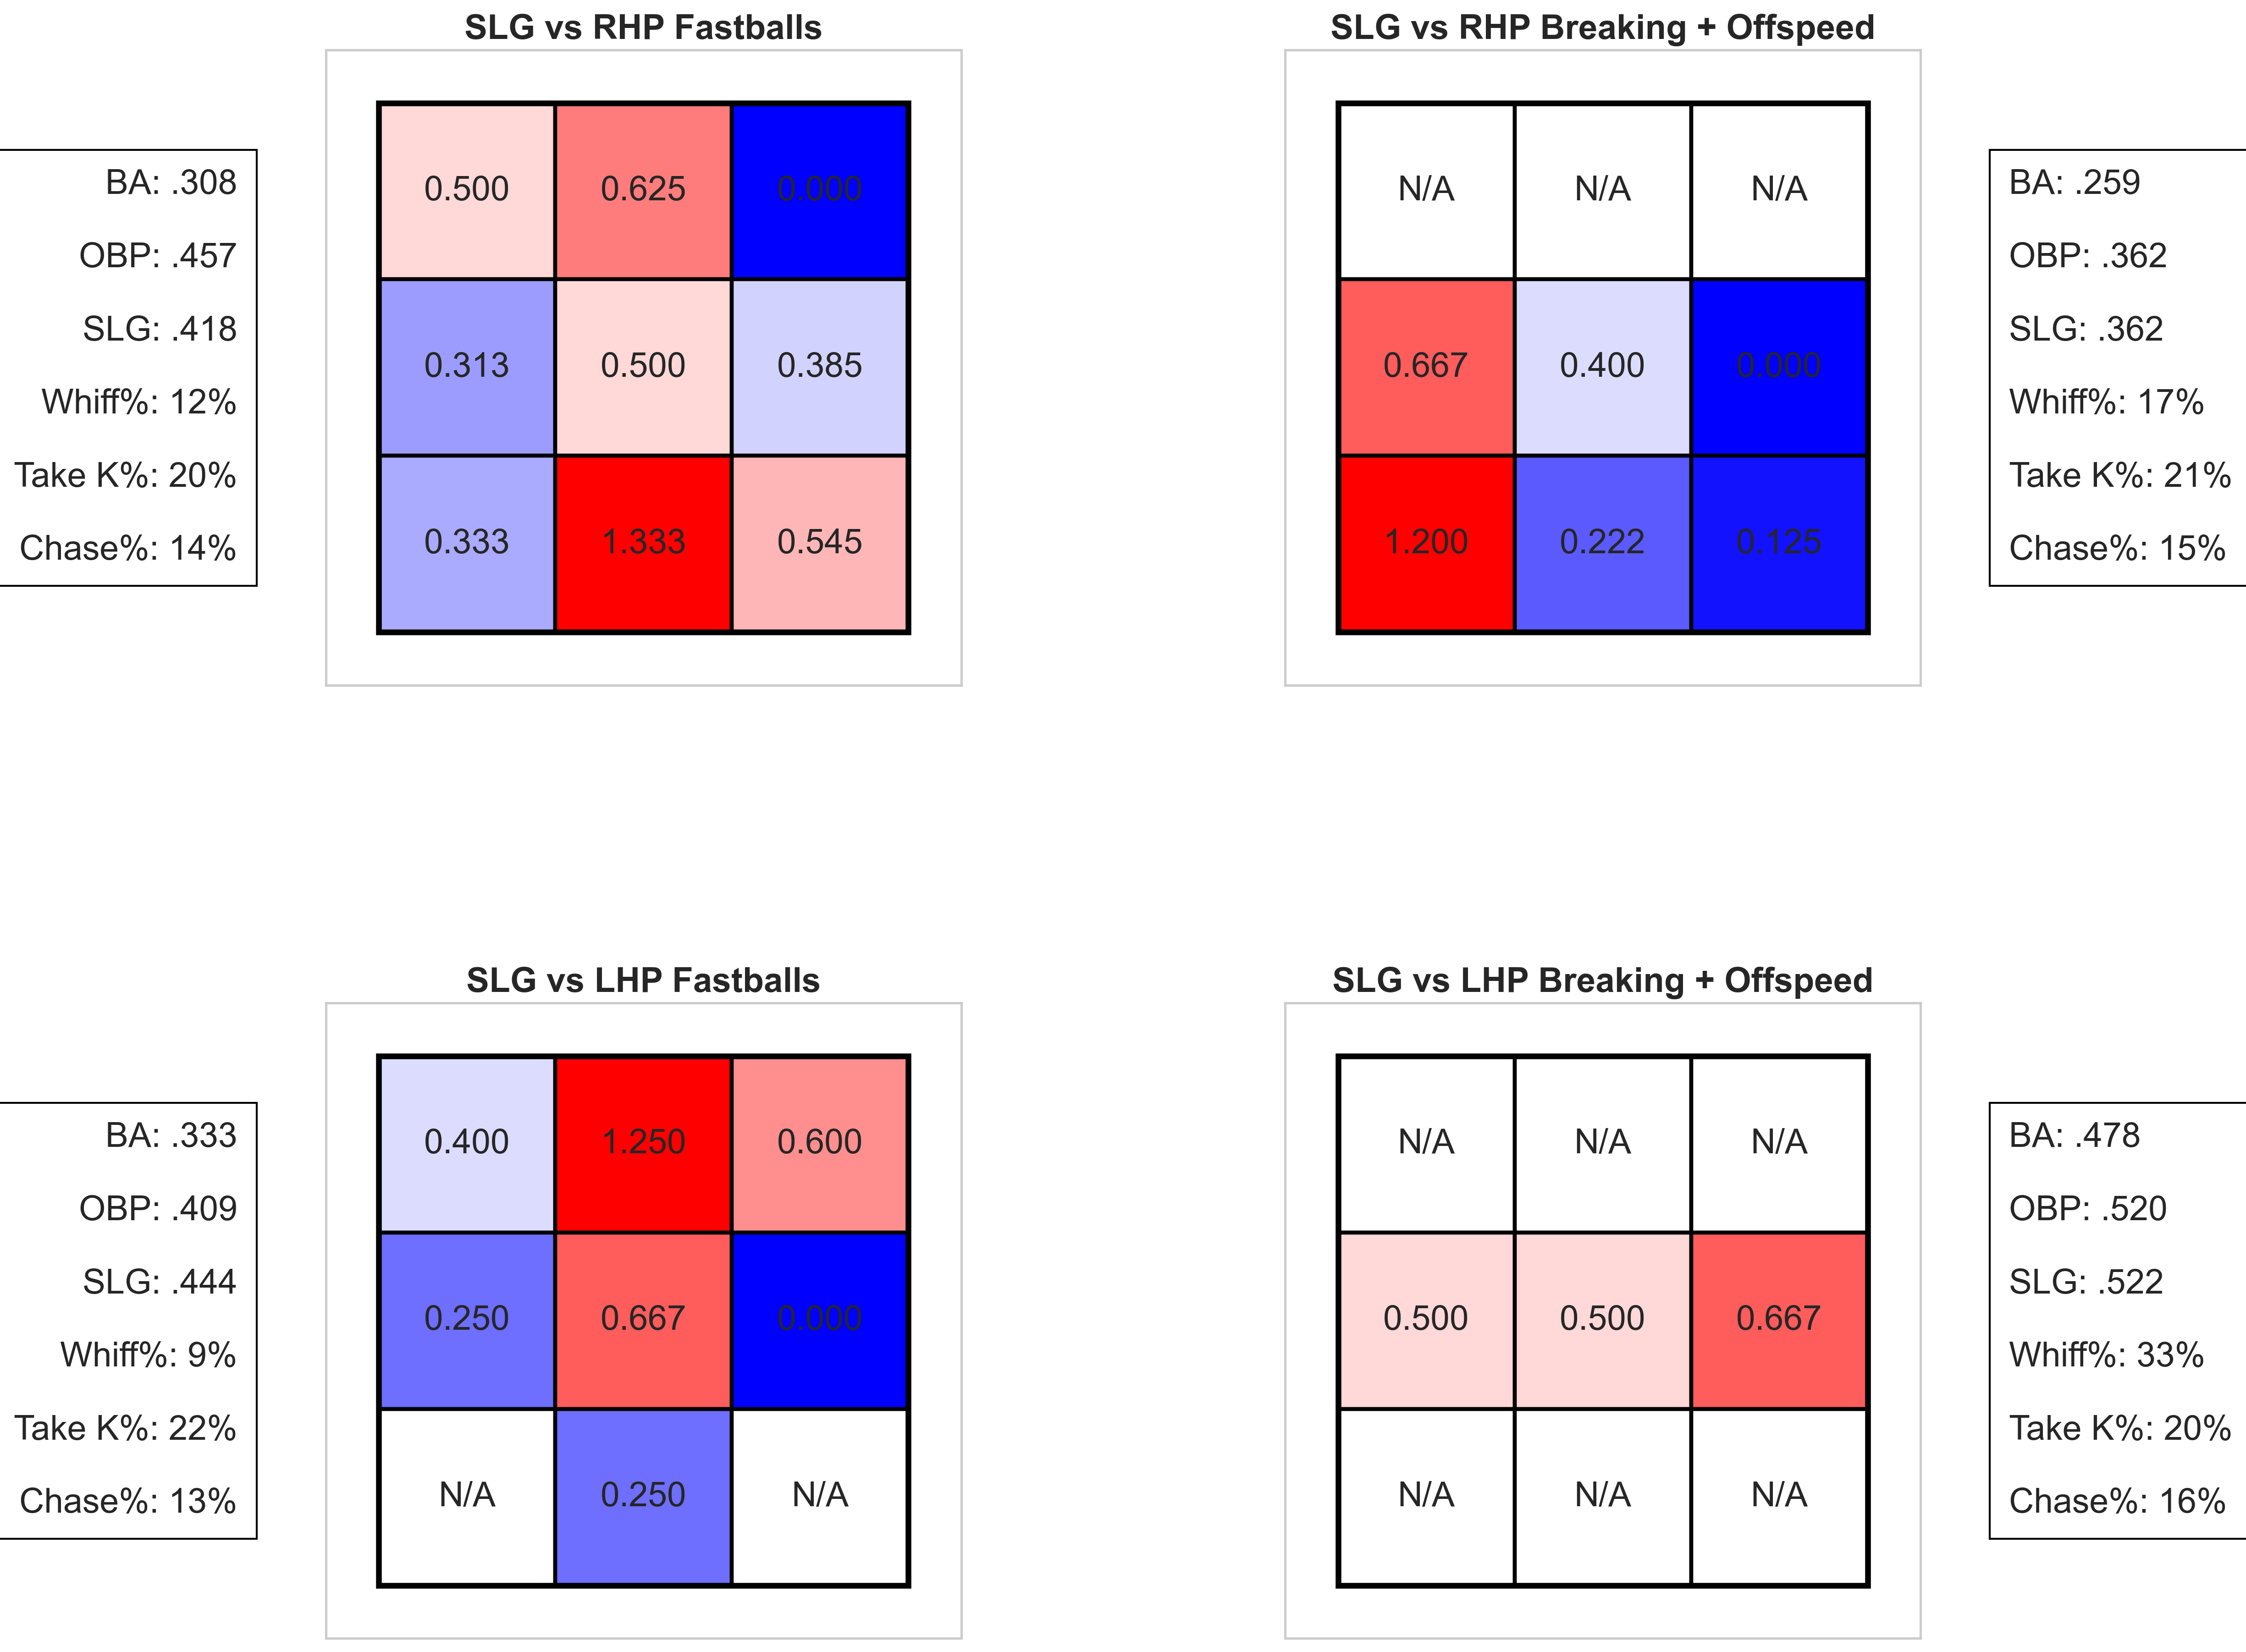

In [11]:
def slg_zones(data_dict, stats_dict, ax: plt.Axes, title: str):
    low_threshold = 0.100  
    high_threshold = 0.794 

    custom_cmap = LinearSegmentedColormap.from_list(
        'custom_gradient', ['#0000FF', 'white', '#FF0000'], N=256)

    SLG_values = data_dict[title]

    norm_values = np.full(SLG_values.shape, np.nan)
    for i in range(SLG_values.shape[0]):
        for j in range(SLG_values.shape[1]):
            if isinstance(SLG_values[i][j], (int, float)):
                norm_values[i][j] = np.clip(
                    (SLG_values[i][j] - low_threshold) / (high_threshold - low_threshold), 0, 1)

    for i in range(3):
        for j in range(3):
            if SLG_values[i][j] == "N/A":
                color = 'white'
                value_text = "N/A"
            else:
                color = custom_cmap(norm_values[i][j])
                value_text = f"{float(SLG_values[i][j]):.3f}"

            rect = plt.Rectangle((j, 2 - i), 1, 1, facecolor=color, edgecolor='black', linewidth=2)
            ax.add_patch(rect)

            ax.text(j + 0.5, 2 - i + 0.5, value_text, ha='center', va='center', fontsize=18)

    for line in [1, 2]:
        ax.plot([0, 3], [line, line], color='black', linewidth=2) 
        ax.plot([line, line], [0, 3], color='black', linewidth=2)

    outer_border = plt.Rectangle((0, 0), 3, 3, edgecolor='black', linewidth=3, facecolor='none')
    ax.add_patch(outer_border)

    ax.set_xlim(-0.3, 3.3)
    ax.set_ylim(-0.3, 3.3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(title, fontweight='bold', fontsize=18)  

    stats = stats_dict[title]
    stats_text = "\n\n".join([f"{key}: {value}" for key, value in stats.items()]) 

    if title == "SLG vs RHP Fastballs":
        box_x = -0.8
        ha = 'right'
    elif title == "SLG vs LHP Breaking + Offspeed":
        box_x = 3.8
        ha = 'left'
    else:
        box_x = 3.8 if title.startswith("SLG vs RHP") else -0.8
        ha = 'left' if title.startswith("SLG vs RHP") else 'right'

    ax.text(
        box_x, 1.5, stats_text, fontsize=18, ha=ha, va='center', 
        bbox=dict(facecolor='white', edgecolor='black', pad=10)
    )

# CHANGE
data = {
    "SLG vs RHP Fastballs": np.array([
        [.500, .625, .000],
        [.313, .500, .385],
        [.333, 1.333, .545]
    ], dtype=object),
    "SLG vs RHP Breaking + Offspeed": np.array([
        ["N/A", "N/A", "N/A"],
        [.667, .400, 0.000],
        [1.200, 0.222, 0.125]
    ], dtype=object),
    "SLG vs LHP Fastballs": np.array([
        [0.400, 1.250, .600],
        [0.250, 0.667, 0.000],
        ["N/A", .250, "N/A"]
    ], dtype=object),
    "SLG vs LHP Breaking + Offspeed": np.array([
        ["N/A", "N/A", "N/A"],
        [0.500, 0.500, 0.667],
        ["N/A", "N/A", "N/A"]
    ], dtype=object)
}

stats = {
    "SLG vs RHP Fastballs": {"BA": ".308", "OBP": ".457", "SLG": ".418", "Whiff%": "12%", "Take K%": "20%", "Chase%": "14%"},
    "SLG vs RHP Breaking + Offspeed": {"BA": ".259", "OBP": ".362", "SLG": ".362", "Whiff%": "17%", "Take K%": "21%", "Chase%": "15%"},
    "SLG vs LHP Fastballs": {"BA": ".333", "OBP": ".409", "SLG": ".444", "Whiff%": "9%", "Take K%": "22%", "Chase%": "13%"},
    "SLG vs LHP Breaking + Offspeed": {"BA": ".478", "OBP": ".520", "SLG": ".522", "Whiff%": "33%", "Take K%": "20%", "Chase%": "16%"}
}

fig, ax = plt.subplots(2, 2, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

for i in range(2):
    for j in range(2):
        title = list(data.keys())[i * 2 + j]
        slg_zones(data, stats, ax[i, j], title)

plt.show()

In [42]:
def hitting_dashboard():

    fig = plt.figure(figsize=(30, 25))

    gs = gridspec.GridSpec(12, 9,
                        height_ratios=[1, 0, 54, 12, 15, 15, 7, 20, 20, 20, 20, 5],
                        width_ratios=[60, 15, 15, 15, 15, 1, 50, 50, 60])

    ax_name = fig.add_subplot(gs[0, 1:8])
    ax_headshot = fig.add_subplot(gs[2, 1:8])
    ax_bio = fig.add_subplot(gs[2, 3:7])
    ax_bstats = fig.add_subplot(gs[3, 1:8])
    ax_advstats = fig.add_subplot(gs[4, 1:8])
    ax_defstats = fig.add_subplot(gs[5, 1:8])
    ax_spray = fig.add_subplot(gs[7:12, 0:3])

    ax_slg_rhp_fastballs = fig.add_subplot(gs[6:9, 6:7])
    ax_slg_rhp_breaking_offspeed = fig.add_subplot(gs[6:9, 7:8])
    ax_slg_lhp_fastballs = fig.add_subplot(gs[9:12, 6:7])
    ax_slg_lhp_breaking_offspeed = fig.add_subplot(gs[9:12, 7:8])

    fontsize = 18

    player_name(ax=ax_name)
    player_headshot(ax=ax_headshot)
    player_bio(ax=ax_bio)
    basic_stats_table(ax=ax_bstats)
    advanced_stats_table(ax=ax_advstats)
    defensive_stats_table(ax=ax_defstats)
    spray_chart(file_path, ax=ax_spray)

    slg_zones(data, stats, ax=ax_slg_rhp_fastballs, title="SLG vs RHP Fastballs")
    slg_zones(data, stats, ax=ax_slg_rhp_breaking_offspeed, title="SLG vs RHP Breaking + Offspeed")
    slg_zones(data, stats, ax=ax_slg_lhp_fastballs, title="SLG vs LHP Fastballs")
    slg_zones(data, stats, ax=ax_slg_lhp_breaking_offspeed, title="SLG vs LHP Breaking + Offspeed")

    #CHANGE
    notes(fig, x=0.11, y=.9, text="Notes:", fontsize=30, fontweight='bold', color='maroon')
    notes(fig, x=-0.01, y=0.875, text="86th best prospect in GA Class of 2023 (PG)", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=-0.01, y=0.85, text="Transfered to GT from Georgia So.", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=-0.01, y=0.825, text="Likely a middle of the order bat that starts at first in the spring", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=-0.01, y=0.8, text="Hit for more power this fall", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=-0.01, y=0.775, text="", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=-0.01, y=0.75, text="", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=-0.01, y=0.725, text="", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=-0.01, y=0.7, text="", fontsize=22, fontweight='normal', color='maroon')

    notes(fig, x=0.84, y=.9, text="Notes:", fontsize=30, fontweight='bold', color='maroon')
    notes(fig, x=0.74, y=0.875, text="Balanced stance setup", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=0.74, y=0.85, text="Short leg lift and no stride before swing", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=0.74, y=0.825, text="Simple load; very little hand movement before they come set", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=0.74, y=0.8, text="Polished hitter that attacks all fields at a high level", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=0.74, y=0.775, text="Very patient at the plate (20% First Pitch Swing%)", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=0.74, y=0.75, text="Short swing and patient approach make him a tough out", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=0.74, y=0.725, text="", fontsize=22, fontweight='normal', color='maroon')
    notes(fig, x=0.74, y=0.7, text="", fontsize=22, fontweight='normal', color='maroon')

    plt.show()

hitting_dashboard()